## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

<h2 id ='a'> <pd >Overview</p></h2>
<hr>

<h3>Variable Notes</h3> 

**pclass:** A proxy for socio-economic status (SES)  
* **1st =** Upper  
* **2nd =** Middle  
* **3rd =** Lower  

**age:** Age is fractional if less than 1.

**sibsp:** The dataset defines family relations in this way:  
* **Sibling =** brother, sister, stepbrother, stepsister  
* **Spouse =** husband, wife (mistresses and fiancés were ignored)  

**parch:** The dataset defines family relations in this way:  
* **Parent =** mother, father  
* **Child =** daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

<h2 id ='a'> <pd >Read Data</p></h2>
<hr>

In [1]:
import pandas as pd
df=pd.read_csv('..\\Data\\titanic.csv')

<h2> General review </h2>
    First, it is important to know the data type of every column and the number of missing values present
<hr>

<h3>Missing Data<h3/>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are two columns with missing values.  
* Age
* Cabin

In [3]:
for x in ['Age','Cabin']:
    print('{}: {} records are null out of {}. This means {:.2f}% of all records are missing'.format(x,df[x].isna().sum(),len(df[x]),df[x].isna().sum()/len(df[x])*100) )

Age: 177 records are null out of 891. This means 19.87% of all records are missing
Cabin: 687 records are null out of 891. This means 77.10% of all records are missing


 
<table>
    <tr>
        <td>For Exploratory Data Analysis the variable <strong>Age</strong> will be taken into account to check some inference with Survival rate.</td>
        <td>For Exploratory Data Analysis the variable <strong>Cabin</strong> does not have enough data for find out its stadistics and relationship with other variables. So, this variables will not be included.</td>
    </tr>
</table>

<h3>Data Type<h3/>

Considering Data type of all columns are not consistent with their content, Dataframe aatributes should be converted

In [4]:
for i in df.columns:
    print(i,len(df[i].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


From the previous code the columns that can be considered as categorical are :
<table>
    <tr>
        <td>Survived</td>
        <td>Pclass</td>
        <td>Sex</td>
        <td>SibSp</td>
        <td>Parch</td>
        <td>Embarked</td>
    </tr>
</table>
From the previous code the columns that can be considered as numerical are :
<table>
    <tr>
        <td>Fare</td>
        <td>Age</td>
    </tr>
</table>
The following variables won´t be analyzed due to missing values or quality data.
<table>
    <tr>
        <td>Ticket</td>
        <td>PassengerId</td>
        <td>Cabin</td>
        <tr>
            <td>Low Quality Data</td>
            <td>Key of the rows</td>
            <td>Not enough data</td>
        </tr>
    </tr>
</table>

In [5]:
df1=df.copy()
df1.drop(['Cabin','Ticket'],axis=1)
df1.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
df1.Survived=df1.Survived.astype('category')
df1.Pclass=df1.Pclass.astype('category')
df1.Sex=df1.Sex.astype('category')
df1.SibSp=df1.SibSp.astype('category')
df1.Parch=df1.Parch.astype('category')
df1.Embarked=df1.Embarked.astype('category')

As Age should be integer and this data type cannot be a empty value, all null values will be replace to -1

In [7]:
df1.Age=df1.Age.fillna(-1)
df1.Age=df1.Age.astype('int64')
df1.Fare=df1.Fare.astype('float64')

##### Let ´s see the result

In [8]:
df1.describe()

,PassengerId,Age,Fare
count,891.000000,891.000000,891.000000
mean,446.000000,23.584736,32.204208
std,257.353842,17.868570,49.693429
min,1.000000,-1.000000,0.000000
25%,223.500000,6.000000,7.910400
50%,446.000000,24.000000,14.454200
75%,668.500000,35.000000,31.000000
max,891.000000,80.000000,512.329200


<h3>Determine if the survival rate is associated to the class of passenger<h3/>

In [9]:
survived_results=df.Survived.value_counts(normalize=True)
print('Only {:.2f}% of persons survived'.format(survived_results[1]/sum(survived_results)*100))

Only 38.38% of persons survived


##### Univariable Analysis Categorical Variable

<AxesSubplot:xlabel='Embarked', ylabel='count'>

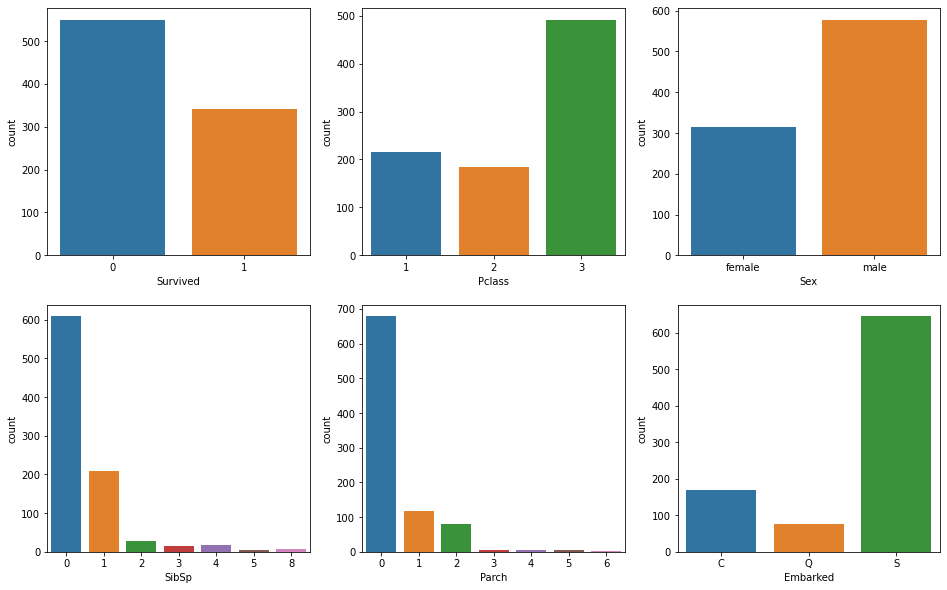

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
fig=sns.countplot(data=df1, x='Survived')
plt.subplot(2,3,2)
sns.countplot(x='Pclass',data=df1)
plt.subplot(2,3,3)
sns.countplot(x='Sex',data=df1)
plt.subplot(2,3,4)
sns.countplot(x='SibSp',data=df1)
plt.subplot(2,3,5)
sns.countplot(x='Parch',data=df1)
plt.subplot(2,3,6)
sns.countplot(x='Embarked',data=df1)

* Mayority of people were death
* Between all classes, class 3 was almost the double amount compared to class 1 y 2.
* Mayority of people were men.
* Majority of people did not have any siblings / spouses aboard the Titanic
* Majority of people did not have any parents / children aboard the Titanic
* Majority of the people embarked by the port S

##### Univariable Analysis Numerical Variable

<AxesSubplot:xlabel='Age'>

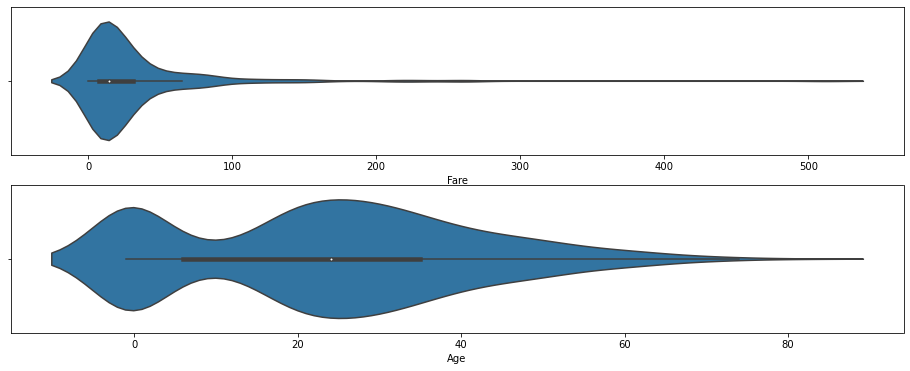

In [11]:
import seaborn as sns
plt.figure(figsize=(16,6))
plt.subplot(2,1,1)
sns.violinplot(data=df1, x='Fare')
plt.subplot(2,1,2)
sns.violinplot(data=df1, x='Age')


* Fare are too many outliers where some persons paid much more than others.
* The Age has a bimodal distribution, which means two peaks located around 0 and 25 years. The number of young people was significantly higher than the elderly. So the number of babies or newly born was almost the same amount as 25-year-old people.

##### Bivariable Analysis Categorical Variable

###### Survived

<AxesSubplot:xlabel='Survived'>

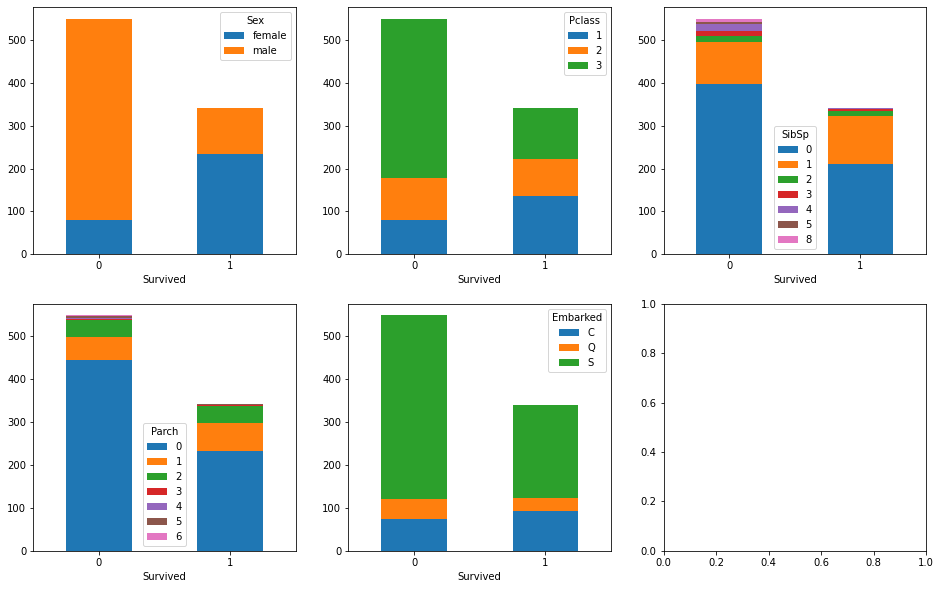

In [12]:
my_crosstab_sex = pd.crosstab(index=df1["Survived"], 
                            columns=df1["Sex"],)
my_crosstab_class = pd.crosstab(index=df1["Survived"], 
                            columns=df1["Pclass"],)

my_crosstab_SibSp = pd.crosstab(index=df1["Survived"], 
                            columns=df1["SibSp"],)
my_crosstab_Parch = pd.crosstab(index=df1["Survived"], 
                            columns=df1["Parch"],)
my_crosstab_Embarked = pd.crosstab(index=df1["Survived"], 
                            columns=df1["Embarked"],)
#plt.figure(figsize=(16,6))
fig, axes=plt.subplots(2,3,figsize=(16,10))
my_crosstab_sex.plot(kind='bar', stacked=True, rot=0,ax=axes[0,0])
my_crosstab_class.plot(kind='bar', stacked=True, rot=0,ax=axes[0,1])
my_crosstab_SibSp.plot(kind='bar', stacked=True, rot=0,ax=axes[0,2])
my_crosstab_Parch.plot(kind='bar', stacked=True, rot=0,ax=axes[1,0])
my_crosstab_Embarked.plot(kind='bar', stacked=True, rot=0,ax=axes[1,1])

###### Class

<AxesSubplot:xlabel='Pclass'>

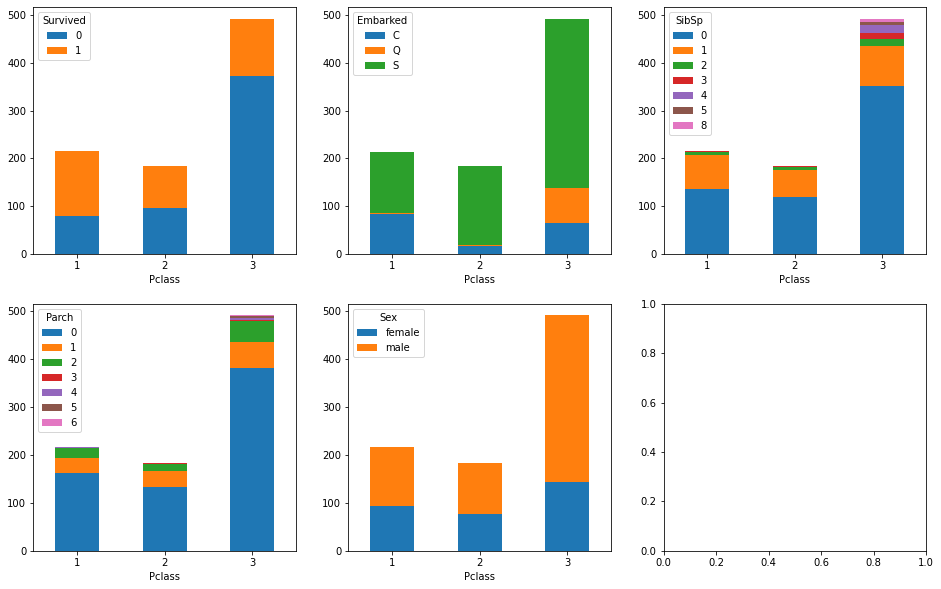

In [13]:
my_crosstab_class = pd.crosstab(index=df1["Pclass"], 
                            columns=df1["Survived"],)
my_crosstab_class2 = pd.crosstab(index=df1["Pclass"], 
                            columns=df1["Embarked"],)
my_crosstab_class3 = pd.crosstab(index=df1["Pclass"], 
                            columns=df1["SibSp"],)
my_crosstab_class4 = pd.crosstab(index=df1["Pclass"], 
                            columns=df1["Parch"],)
my_crosstab_class5 = pd.crosstab(index=df1["Pclass"], 
                            columns=df1["Sex"],)
fig, axes=plt.subplots(2,3,figsize=(16,10))
my_crosstab_class.plot(kind='bar', stacked=True, rot=0,ax=axes[0,0])
my_crosstab_class2.plot(kind='bar', stacked=True, rot=0,ax=axes[0,1])
my_crosstab_class3.plot(kind='bar', stacked=True, rot=0,ax=axes[0,2])
my_crosstab_class4.plot(kind='bar', stacked=True, rot=0,ax=axes[1,0])
my_crosstab_class5.plot(kind='bar', stacked=True, rot=0,ax=axes[1,1])


###### Embarked

<AxesSubplot:xlabel='Embarked'>

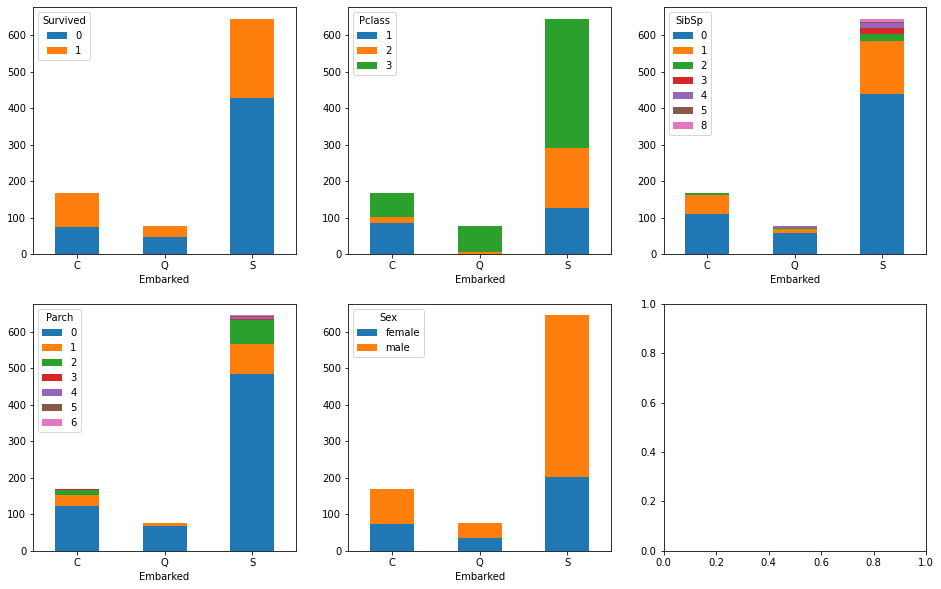

In [14]:
my_crosstab_e = pd.crosstab(index=df1["Embarked"], 
                            columns=df1["Survived"],)
my_crosstab_e2 = pd.crosstab(index=df1["Embarked"], 
                            columns=df1["Pclass"],)
my_crosstab_e3 = pd.crosstab(index=df1["Embarked"], 
                            columns=df1["SibSp"],)
my_crosstab_e4 = pd.crosstab(index=df1["Embarked"], 
                            columns=df1["Parch"],)
my_crosstab_e5 = pd.crosstab(index=df1["Embarked"], 
                            columns=df1["Sex"],)

fig, axes=plt.subplots(2,3,figsize=(16,10))
my_crosstab_e.plot(kind='bar', stacked=True, rot=0,ax=axes[0,0])
my_crosstab_e2.plot(kind='bar', stacked=True, rot=0,ax=axes[0,1])
my_crosstab_e3.plot(kind='bar', stacked=True, rot=0,ax=axes[0,2])
my_crosstab_e4.plot(kind='bar', stacked=True, rot=0,ax=axes[1,0])
my_crosstab_e5.plot(kind='bar', stacked=True, rot=0,ax=axes[1,1])

<div class="alert alert-block alert-info">
<p style='text-align:center'>Insights</p>

* High Proportion of people who survived were Female.
* High proportion of people who no survived were in class 3
* High proportion of people who did not have any siblings / sposes aboard the Titanic did not survived
* High proportion of people who did not have any parents / children aboard the Titanic did not survived
* High porportion of people who embarked by port S were from class 3
* The proportion of numbers of parents / children does not have any relation whether they survived or not.
* The proportion of numbers of siblings / sposes does not have any relation whether they survived or not.
* The proportion of surviver does not correlate with the sex
* The majority of people who embarked in port Q were from class 3
* The proportion of people who did not survived Embarked in the Port S

##### Analysis for continous variables

This analysis for continous variables rows with Age in null (-1) will drop. 

In [15]:
import numpy as np
df1_numerical=df1.loc[df1.Age!=-1]

<Figure size 1152x720 with 0 Axes>

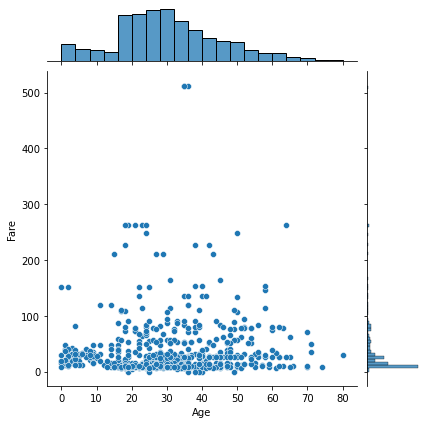

In [16]:
plt.figure(figsize=(16,10))
sns.jointplot(x="Age", y="Fare", data=df1_numerical)

* Two values of Fare can be considered outliers
* Distribution of Age is not uniform due to there being a lack of people lower than 20. The among of young people was comparatively low with adults.
* The Fare distribution is right-skewed, its peak raises around 10 or 20.

<h2>Hypotesis</h2>

<div class="alert alert-block alert-warning">
<p style='text-align:center'>Once we did the <b>EDA</b>, we have enough understanding of the data to test the hypothesis</p> 

<div class="alert alert-block alert-danger">
<h3><p style='text-align:center'><b>Determine if the survival rate is associated to the class of passenger</b></p> 

<p>The hypothesis will be test looks like:</p>
<p style='text-align:center'><b>$H_0$:</b> <u><i>Survival rate</i></u> and <u><i>class of passenger</i></u> are independent to each other among all subjects in the population</p>
<p style='text-align:center'><b>$H_a$:</b> <u><i>Survival rate</i></u> and <u><i>class of passenger</i></u> are <b>NOT</b> independent to each other among all subjects in the population</p>

In [17]:
contingency_class_sr_freq=pd.crosstab(index=df1.Survived,columns=df1.Embarked)
contingency_class_sr_freq

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [18]:
contingency_class_sr_percentage=pd.crosstab(index=df1.Survived,columns=df1.Pclass,normalize='columns',margins=True)*100
contingency_class_sr_percentage

Pclass,1,2,3,All
Survived,,,,
0,37.037037,52.717391,75.763747,61.616162
1,62.962963,47.282609,24.236253,38.383838


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

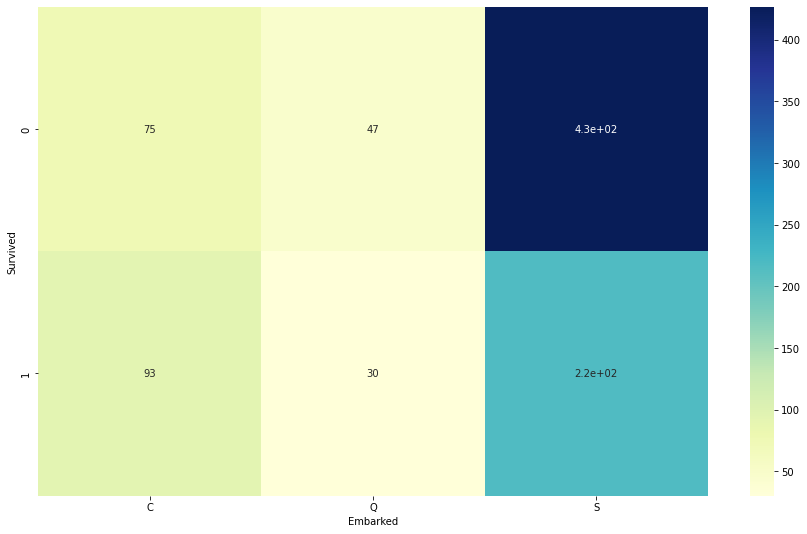

In [19]:
plt.figure(figsize=(15,9)) 
sns.heatmap(contingency_class_sr_freq, annot=True, cmap="YlGnBu")

In [20]:
from scipy.stats import chi2_contingency
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contingency_class_sr_freq) 
# Print the p-value
print(p)

1.769922284120912e-06


<div class="alert alert-block alert-info">
<p><b>The p value was so much less than 0.05, so there is enough statistical evidence to reject the null hypothesis and conclude that the variables are not significatly independent to each other among all the subject in the population .</b></p>

<div class="alert alert-block alert-danger">
<h3><p style='text-align:center'><b>Determine if the survival rate is associated to the gender</b></p> 

<p>The hypothesis will be test looks like:</p>
<p style='text-align:center'><b>$H_0$:</b> <u><i>Survival rate</i></u> and <u><i>gender</i></u> are independent to each other among all subjects in the population</p>
<p style='text-align:center'><b>$H_a$:</b> <u><i>Survival rate</i></u> and <u><i>gender</i></u> are <b>NOT</b> independent to each other among all subjects in the population</p>

In [21]:
contingency_sex_sr_freq=pd.crosstab(index=df1.Survived,columns=df1.Sex)
contingency_sex_sr_freq

Sex,female,male
Survived,,
0,81,468
1,233,109


In [22]:
contingency_sex_sr_percentage=pd.crosstab(index=df1.Survived,columns=df1.Sex,normalize='columns',margins=True)*100
contingency_sex_sr_percentage

Sex,female,male,All
Survived,,,
0,25.796178,81.109185,61.616162
1,74.203822,18.890815,38.383838


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

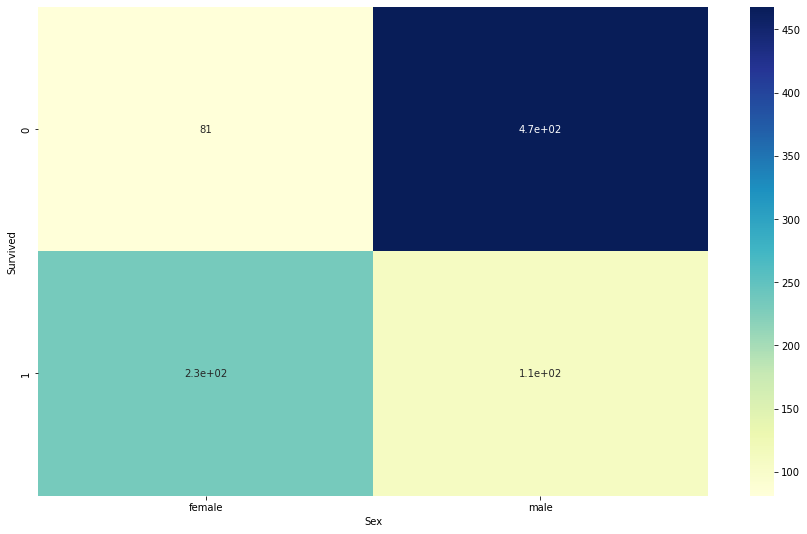

In [23]:
plt.figure(figsize=(15,9)) 
sns.heatmap(contingency_sex_sr_freq, annot=True, cmap="YlGnBu")

In [24]:
from scipy.stats import chi2_contingency
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contingency_sex_sr_freq) 
# Print the p-value
print(p)

1.1973570627755645e-58


<div class="alert alert-block alert-info">
<p><b>The p value was so much less than 0.05, so there is enough statistical evidence to reject the null hypothesis and conclude that the variables are not significatly independent to each other among all the subject in the population .</b></p>

<div class="alert alert-block alert-danger">
<h3><p style='text-align:center'><b>Determine the survival rate is associated to the age</b></p> 

<p>The hypothesis will be test looks like:</p>
<p style='text-align:center'><b>$H_0$:</b> <u><i>Survival rate</i></u> and <u><i>age</i></u> are independent to each other among all subjects in the population</p>
<p style='text-align:center'><b>$H_a$:</b> <u><i>Survival rate</i></u> and <u><i>age</i></u> are <b>NOT</b> independent to each other among all subjects in the population</p>

Even though the variable **Age** is numerical, doing a data analysis with range of ages would be more insightful than only the ages as integers.  
The ranges to change this variable into categorical with 5 levels will be like this:
<li><b>minors :</b> 0 to 17</li>
<li><b>young :</b> 18 to 29</li>
<li><b>adults :</b> 30 to 44</li>
<li><b>adults-2 :</b> 45 to 60</li>
<li><b>elderly :</b> greater than 60</li>
<li><b>No values :</b> null</li>

In [26]:
import numpy as np
df['Age_t']=0
df.loc[(df.Age>=0) & (df.Age<18),'Age_t']='minors'
df.loc[(df.Age>=18) & (df.Age<30),'Age_t']='young'
df.loc[(df.Age>=30) & (df.Age<45),'Age_t']='adults'
df.loc[(df.Age>=45) & (df.Age<60),'Age_t']='adults-2'
df.loc[(df.Age>=60),'Age_t']='elderly'
df.loc[np.isnan(df.Age),'Age_t']='No values'

In [27]:
df.Age_t.unique()

array(['young', 'adults', 'No values', 'adults-2', 'minors', 'elderly'],
      dtype=object)

<p>The hypothesis will be test looks like:</p>
<p style='text-align:center'><b>$H_0$:</b> <u><i>Survival rate</i></u> and <u><i>Age Ranges</i></u> are independent to each other among all subjects in the population</p>
<p style='text-align:center'><b>$H_a$:</b> <u><i>Survival rate</i></u> and <u><i>Age Ranges</i></u> are <b>NOT</b> independent to each other among all subjects in the population</p>

In [28]:
contingency_age_sr_freq=pd.crosstab(index=df.Survived,columns=df.Age_t)
contingency_age_sr_freq

Age_t,No values,adults,adults-2,elderly,minors,young
Survived,,,,,,
0,125,124,53,19,52,176
1,52,91,36,7,61,95


In [29]:
contingency_age_sr_percentage=pd.crosstab(index=df.Survived,columns=df.Age_t,normalize='columns',margins=True)*100
contingency_age_sr_percentage

Age_t,No values,adults,adults-2,elderly,minors,young,All
Survived,,,,,,,
0,70.621469,57.674419,59.550562,73.076923,46.017699,64.944649,61.616162
1,29.378531,42.325581,40.449438,26.923077,53.982301,35.055351,38.383838


<AxesSubplot:xlabel='Age_t', ylabel='Survived'>

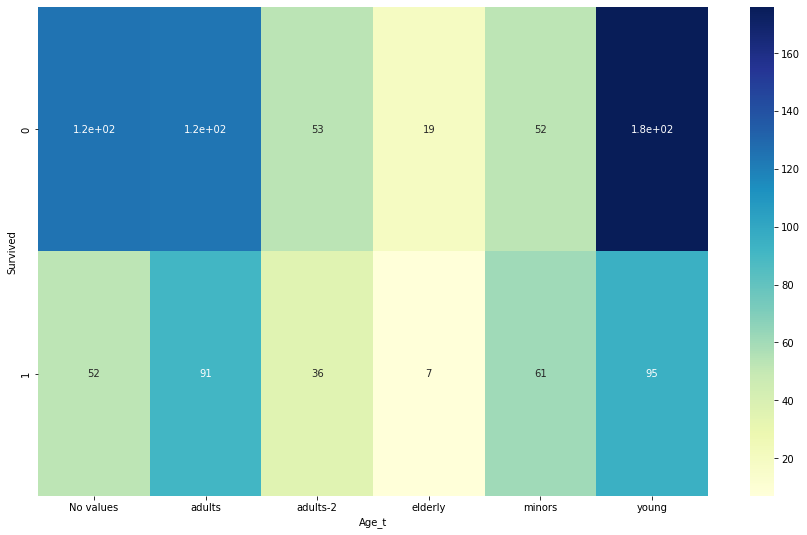

In [30]:
plt.figure(figsize=(15,9)) 
sns.heatmap(contingency_age_sr_freq, annot=True, cmap="YlGnBu")

In [31]:
from scipy.stats import chi2_contingency
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contingency_age_sr_freq) 
# Print the p-value
print(p)

0.0005280305666542873


<div class="alert alert-block alert-info">
<p><b>The p value was so much less than 0.05, so there is enough statistical evidence to reject the null hypothesis and conclude that the variables are not significatly independent to each other among all the subject in the population .</b></p>